In [1]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().parent))
str(Path.cwd().parent)

'c:\\Users\\Joaquín Amat\\Documents\\GitHub\\skforecast'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# set theme for matplotlib
plt.style.use('seaborn-v0_8-darkgrid')

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregDiff import ForecasterAutoregDiff
from sklearn.linear_model import LinearRegression   
from sklearn.ensemble import RandomForestRegressor
from lineartree import LinearForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

Train dates : 1991-07-01 00:00:00 --- 2003-03-01 00:00:00  (n=141)
Test dates  : 2003-04-01 00:00:00 --- 2008-06-01 00:00:00  (n=63)


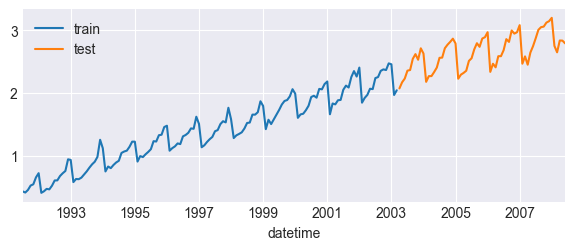

In [3]:
# Download data
# ==============================================================================
url = (
    'https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/'
    'data/h2o.csv'
)
data = pd.read_csv(url, sep=',', header=0, names=['y', 'datetime'])

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d')
data = data.set_index('datetime')
data = data.asfreq('MS')
data = data['y']
data = data.sort_index()

# Add a smooth positive trend
# ==============================================================================
t = np.arange(len(data))
data = data + 0.01 * t

# Data partition train-test
# ==============================================================================
end_train = '2003-03-01 23:59:00'
print(
    f"Train dates : {data.index.min()} --- {data.loc[:end_train].index.max()}  " 
    f"(n={len(data.loc[:end_train])})")
print(
    f"Test dates  : {data.loc[end_train:].index.min()} --- {data.index.max()}  "
    f"(n={len(data.loc[end_train:])})")

# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 2.5))
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
ax.legend();

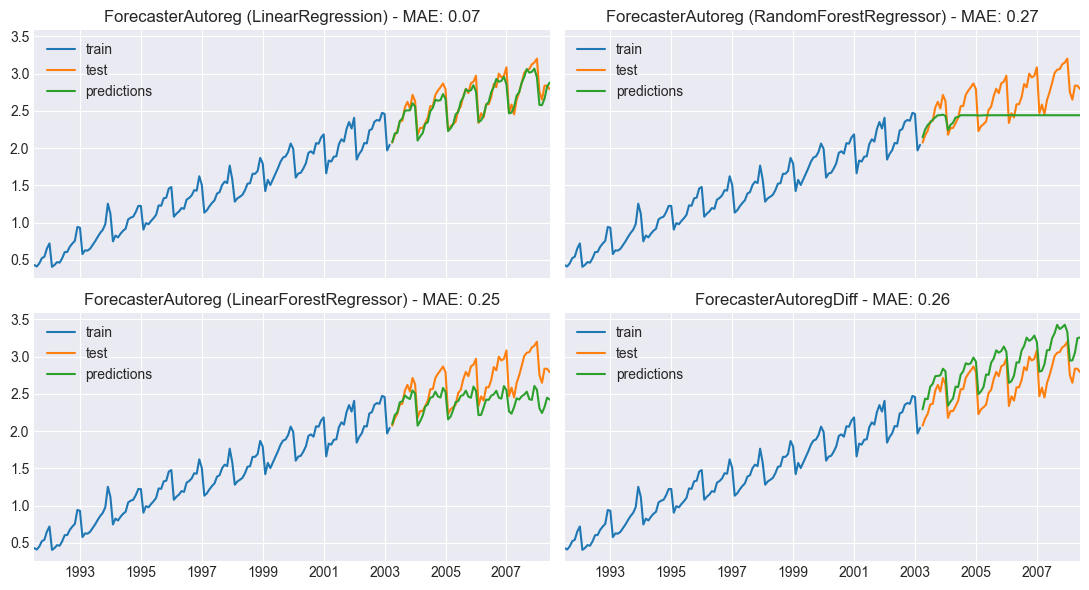

In [4]:
# Compare predictions of different models
# ==============================================================================
regressors = [
    LinearRegression(),
    RandomForestRegressor(random_state=123),
    LinearForestRegressor(base_estimator=LinearRegression(), max_features='sqrt')
]

fig, ax = plt.subplots(2, 2, figsize=(11, 6), sharex=True, sharey=True)
ax = ax.ravel()

# ForecasterAutoreg
for i, regressor in enumerate(regressors):
    forecaster = ForecasterAutoreg(
        regressor=regressor,
        lags=15
    )
    forecaster.fit(y=data.loc[:end_train])
    predictions = forecaster.predict(steps=len(data.loc[end_train:]))
    error = mean_absolute_error(data.loc[end_train:], predictions)
    data.loc[:end_train].plot(ax=ax[i], label='train')
    data.loc[end_train:].plot(ax=ax[i], label='test')
    predictions.plot(ax=ax[i], label='predictions')
    ax[i].set_title(
        f'ForecasterAutoreg ({regressor.__class__.__name__}) - MAE: {error:.2f}',
        size=12
    )
    ax[i].set_xlabel('')
    ax[i].legend()

# ForecasterAutoregDiff with random forest
forecaster = ForecasterAutoregDiff(
                 regressor       = LinearRegression(),
                 lags            = 15,
                 differentiation = 1
            )
forecaster.fit(y=data.loc[:end_train])
predictions = forecaster.predict(steps=len(data.loc[end_train:]))
error = mean_absolute_error(data.loc[end_train:], predictions)
data.loc[:end_train].plot(ax=ax[3], label='train')
data.loc[end_train:].plot(ax=ax[3], label='test')
predictions.plot(ax=ax[3], label='predictions')
ax[3].set_title(f'{forecaster.__class__.__name__} - MAE: {error:.2f}')
ax[3].set_xlabel('')
ax[3].legend()

fig.tight_layout()

In [5]:
forecaster = ForecasterAutoreg(
                 regressor = RandomForestRegressor(random_state=963),
                 lags      = 15
             )

forecaster.fit(y=data.loc[:end_train])
predictions = forecaster.predict(steps=len(data.loc[end_train:]))
predictions

2003-04-01    2.164251
2003-05-01    2.243938
2003-06-01    2.298822
2003-07-01    2.349319
2003-08-01    2.385342
                ...   
2008-02-01    2.441446
2008-03-01    2.441446
2008-04-01    2.441446
2008-05-01    2.441446
2008-06-01    2.441446
Freq: MS, Name: pred, Length: 63, dtype: float64

In [6]:
forecaster = ForecasterAutoregDiff(
                 regressor       = LinearRegression(),
                 lags            = 15,
                 differentiation = 1
            )

forecaster.fit(y=data.loc[:end_train])
predictions = forecaster.predict(steps=len(data.loc[end_train:]))
predictions

2003-04-01    2.291846
2003-05-01    2.436369
2003-06-01    2.428358
2003-07-01    2.596405
2003-08-01    2.635303
                ...   
2008-02-01    2.945370
2008-03-01    2.950350
2008-04-01    3.051329
2008-05-01    3.248765
2008-06-01    3.256217
Freq: MS, Name: pred, Length: 63, dtype: float64

Train dates : 1949-01-01 00:00:00 --- 1955-01-01 00:00:00  (n=73)
Test dates  : 1955-01-01 00:00:00 --- 1960-12-01 00:00:00  (n=72)


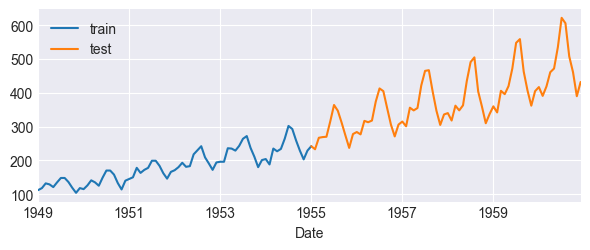

In [7]:
# Download data
# ==============================================================================
url = (
    'https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/'
    'master/data/AirPassengers.csv'
)
data = pd.read_csv(url, sep=',')

# Data preprocessing
# ==============================================================================
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')
data = data.set_index('Date')
data = data.asfreq('MS')
data = data['Passengers']
data = data.sort_index()


# # Data partition train-test
# # ==============================================================================
end_train = '1955-01-01'
print(
    f"Train dates : {data.index.min()} --- {data.loc[:end_train].index.max()}  " 
    f"(n={len(data.loc[:end_train])})")
print(
    f"Test dates  : {data.loc[end_train:].index.min()} --- {data.index.max()}  "
    f"(n={len(data.loc[end_train:])})")

# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 2.5))
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
ax.legend();

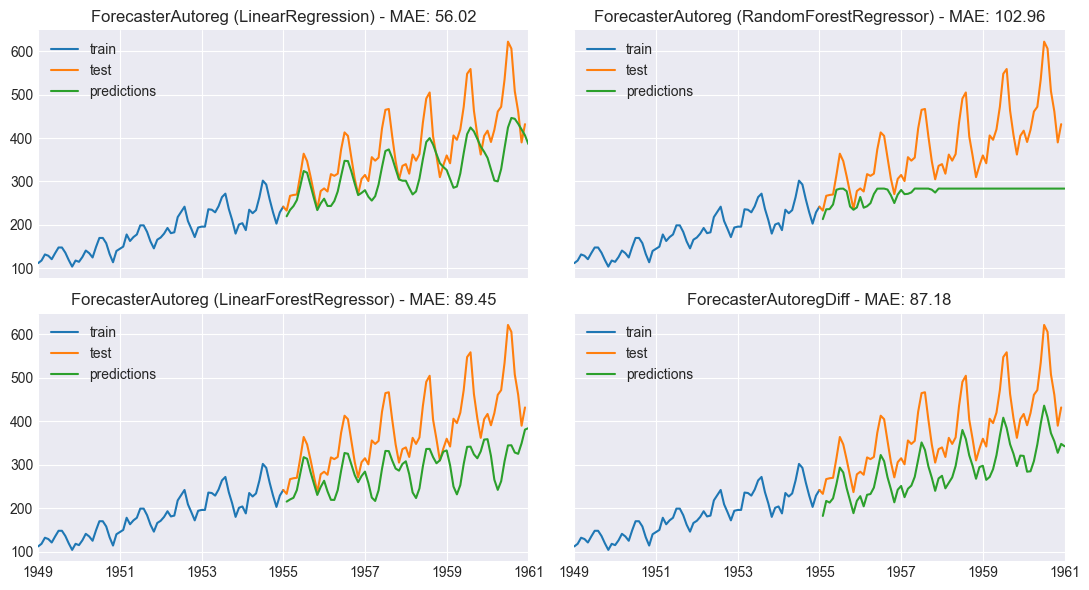

In [11]:
# Compare predictions of different models
# ==============================================================================
regressors = [
    LinearRegression(),
    RandomForestRegressor(random_state=123),
    LinearForestRegressor(base_estimator=LinearRegression(), max_features='sqrt')
]

fig, ax = plt.subplots(2, 2, figsize=(11, 6), sharex=True, sharey=True)
ax = ax.ravel()

# ForecasterAutoreg
for i, regressor in enumerate(regressors):
    forecaster = ForecasterAutoreg(
        regressor=regressor,
        lags=12
    )
    forecaster.fit(y=data.loc[:end_train])
    predictions = forecaster.predict(steps=len(data.loc[end_train:]))
    error = mean_absolute_error(data.loc[end_train:], predictions)
    data.loc[:end_train].plot(ax=ax[i], label='train')
    data.loc[end_train:].plot(ax=ax[i], label='test')
    predictions.plot(ax=ax[i], label='predictions')
    ax[i].set_title(
        f'ForecasterAutoreg ({regressor.__class__.__name__}) - MAE: {error:.2f}',
        size=12
    )
    ax[i].set_xlabel('')
    ax[i].legend()

# ForecasterAutoregDiff with random forest
forecaster = ForecasterAutoregDiff(
                 regressor       = LinearRegression(),
                 lags            = 12,
                 differentiation = 1
            )
forecaster.fit(y=data.loc[:end_train])
predictions = forecaster.predict(steps=len(data.loc[end_train:]))
error = mean_absolute_error(data.loc[end_train:], predictions)
data.loc[:end_train].plot(ax=ax[3], label='train')
data.loc[end_train:].plot(ax=ax[3], label='test')
predictions.plot(ax=ax[3], label='predictions')
ax[3].set_title(f'{forecaster.__class__.__name__} - MAE: {error:.2f}')
ax[3].set_xlabel('')
ax[3].legend()

fig.tight_layout()

In [18]:
# Bootstrapping predictions
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor=RandomForestRegressor(random_state=123),
                lags=12
            )
forecaster.fit(y=data.loc[:end_train])
boo_predictions = forecaster.predict_bootstrapping(
                        steps=len(data.loc[end_train:]),
                        n_boot=10
)
boo_predictions

,pred_boot_0,pred_boot_1,pred_boot_2,pred_boot_3,pred_boot_4,pred_boot_5,pred_boot_6,pred_boot_7,pred_boot_8,pred_boot_9
1955-02-01,215.52,215.96,219.37,213.68,214.17,218.90,212.89,208.10,207.80,208.00
1955-03-01,240.30,231.22,247.84,231.12,231.12,239.22,241.95,230.58,233.49,241.95
1955-04-01,237.40,239.72,247.98,230.45,230.45,232.57,243.64,244.61,242.52,238.94
1955-05-01,250.51,250.17,241.72,242.26,248.10,252.96,239.34,251.61,253.90,243.54
1955-06-01,280.46,277.86,276.45,272.02,283.78,281.86,273.32,289.50,284.49,282.77
...,...,...,...,...,...,...,...,...,...,...
1960-09-01,272.49,279.49,283.10,277.94,276.97,283.98,282.71,277.78,283.14,278.10
1960-10-01,277.43,295.64,289.20,281.71,278.91,272.49,281.16,281.51,289.20,283.25
1960-11-01,284.79,284.47,282.71,277.31,284.36,285.93,292.72,278.75,281.21,285.19
1960-12-01,283.19,283.19,293.02,296.86,276.38,282.71,279.35,289.35,284.12,284.47


In [17]:
forecaster = ForecasterAutoregDiff(
                regressor=RandomForestRegressor(random_state=123),
                lags=12,
                differentiation=1
            )
forecaster.fit(y=data.loc[:end_train])
boo_predictions = forecaster.predict_bootstrapping(
                        steps=len(data.loc[end_train:]),
                        n_boot=10
)
boo_predictions

,pred_boot_0,pred_boot_1,pred_boot_2,pred_boot_3,pred_boot_4,pred_boot_5,pred_boot_6,pred_boot_7,pred_boot_8,pred_boot_9
1955-02-01,204.23,206.81,201.17,204.76,201.17,207.40,204.76,202.88,204.62,205.79
1955-03-01,201.11,202.88,205.09,200.11,200.11,204.23,201.17,200.11,206.34,201.17
1955-04-01,203.53,198.70,197.60,204.62,203.61,200.42,201.17,207.03,207.66,210.39
1955-05-01,198.70,202.20,218.53,202.21,205.93,218.53,201.47,200.43,201.11,207.38
1955-06-01,208.03,200.21,207.38,200.43,201.11,203.24,203.55,207.93,210.39,202.20
...,...,...,...,...,...,...,...,...,...,...
1960-09-01,196.00,199.91,204.64,206.83,207.38,203.76,203.04,204.62,205.28,204.62
1960-10-01,200.28,210.39,207.40,203.61,208.48,196.00,211.17,204.14,207.40,203.53
1960-11-01,203.04,209.52,205.93,199.91,203.04,204.12,207.93,203.55,206.34,200.43
1960-12-01,204.76,204.76,207.93,213.56,201.76,205.93,202.21,218.53,203.24,209.52
